In [1]:
import os
import sys
import requests
import pandas as pd
from lxml import etree as ET
from collections import OrderedDict
import py4cytoscape as p4c

import warnings
warnings.filterwarnings('ignore')


In [4]:
#Defining wikipathway IDs: WP5088, WP5089, WP5068, WP5095, WP2725
WP = 'WP5088'
#importing as network to cytoscape 
cmd_list = ['wikipathways','import-as-pathway','id=" ', WP, '"']
cmd = " ".join(cmd_list)
p4c.commands.commands_get(cmd)

[]

This file already exists. A Cytoscape popup will be generated to confirm overwrite.


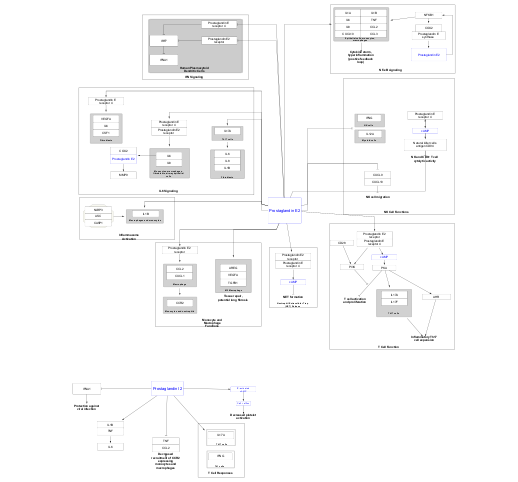

In [5]:
p4c.export_image(filename='pathway.png')
p4c.sandbox_get_from('pathway.png')
from IPython.display import Image
Image('pathway.png')

In [6]:
#loading data expression table
dataExpr = pd.read_csv(r'C:/Users/Aria Jadhav/Downloads/2021-internship-main (1)/2021-internship-main/Marvin/R-data-processing/dataExpr.csv')
dataExpr

,Name,logFC,logCPM,F,PValue,FDR
0,SAA2,2.414265,5.432500,5.120911e+02,1.410000e-12,1.880000e-08
1,CCL20,3.133684,4.949061,4.479182e+02,3.560000e-12,2.380000e-08
2,IL36G,2.722310,4.359048,3.404549e+02,2.360000e-11,1.050000e-07
3,INHBA,1.810556,6.511435,2.727932e+02,1.070000e-10,3.580000e-07
4,TNFAIP3,1.601914,7.418585,2.634266e+02,1.360000e-10,3.630000e-07
...,...,...,...,...,...,...
13345,ZNF490,0.000135,2.994039,6.670000e-07,9.993599e-01,9.995575e-01
13346,NCKAP5L,0.000134,4.886377,6.200000e-07,9.993826e-01,9.995575e-01
13347,FBXO24,-0.000524,-0.670124,5.710000e-07,9.994077e-01,9.995575e-01
13348,IQCD,-0.000026,0.010140,3.570000e-07,9.995316e-01,9.996065e-01


In [7]:
p4c.load_table_data(dataExpr, data_key_column="Name")

'Success: Data loaded in defaultnode table'

In [8]:
p4c.get_table_column_names('node')

['SUID',
 'shared name',
 'name',
 'selected',
 'GraphID',
 'XrefId',
 'XrefDatasource',
 'Type',
 'IsGPMLShape',
 'Width',
 'Height',
 'FillColor',
 'Color',
 'LabelFont',
 'LabelSize',
 'Transparent',
 'BorderThickness',
 'BorderStyle',
 'Shape',
 'Ensembl',
 'logFC',
 'logCPM',
 'F',
 'PValue',
 'FDR']

In [9]:
#data visualisation
logFC_score_table = p4c.get_table_columns(table='node', columns='logFC')
logFC_score_table.head()

,logFC
2304,NaN
2305,NaN
2306,NaN
2307,NaN
2308,NaN


In [10]:
#setting logFC visualisation
#logFC_min = logFC_score_table.min().values[0]
#logFC_max = logFC_score_table.max().values[0]
#logFC_center = logFC_min + (logFC_max - logFC_min)/2
logFC_min = -1
logFC_max = 1
logFC_center = 0
p4c.set_visual_style('CyTargetLinker_0')

p4c.set_node_color_mapping('logFC', [logFC_min, logFC_center, logFC_max], ['#0000FF', '#FFFFFF', '#FF0000'], style_name = 'CyTargetLinker_0')

''

In [11]:
p4c.set_node_shape_default('ELLIPSE', style_name='CyTargetLinker_0')
p4c.lock_node_dimensions(True, style_name='CyTargetLinker_0')
p4c.set_node_size_default(50, style_name='CyTargetLinker_0')
p4c.set_node_color_default('#D3D3D3', style_name='CyTargetLinker_0')
p4c.set_node_border_width_default(2, style_name='CyTargetLinker_0')
p4c.set_node_color_default('#b5b1b1', style_name='CyTargetLinker_0')
p4c.set_node_label_mapping('name', style_name='CyTargetLinker_0')
p4c.set_node_font_size_default(14, style_name='CyTargetLinker_0')

''

In [12]:
PValue_score_table = p4c.get_table_columns(table='node', columns='PValue')
PValue_min = PValue_score_table.min().values[0]
PValue_max = PValue_score_table.max().values[0]
p4c.set_node_border_width_mapping('PValue', table_column_values=[PValue_min, PValue_max], widths=[5, 5], style_name='CyTargetLinker_0')

''

In [13]:
Sig_gene = p4c.create_column_filter('Sig_gene', 'PValue', 0.05, "LESS_THAN")
Sig_gene

Warning -- Cytoscape version pre-3.9 in use ... settling delay inserted after filter execution


No edges selected.


{'nodes': ['IRF7',
  'VEGFA',
  'IL6',
  'CSF1',
  'IL6',
  'MMP9',
  'IL6',
  'IL1B',
  'CXCL1',
  'VEGFA',
  'CXCL10',
  'NFKB1',
  'IL1B',
  'IL1B',
  'IL6',
  'TNF',
  'TNF',
  'IL6',
  'TNF',
  'IL1A',
  'CXCL10',
  'IL1B'],
 'edges': None}

In [14]:
df = pd.DataFrame(Sig_gene)
df.head()

,nodes,edges
0,IRF7,None
1,VEGFA,None
2,IL6,None
3,CSF1,None
4,IL6,None


In [15]:
sig_gene_exp_list = df["nodes"].tolist()
print(sig_gene_exp_list)

['IRF7', 'VEGFA', 'IL6', 'CSF1', 'IL6', 'MMP9', 'IL6', 'IL1B', 'CXCL1', 'VEGFA', 'CXCL10', 'NFKB1', 'IL1B', 'IL1B', 'IL6', 'TNF', 'TNF', 'IL6', 'TNF', 'IL1A', 'CXCL10', 'IL1B']


In [16]:
p4c.set_node_border_color_bypass(sig_gene_exp_list, '#00ff2a')
p4c.set_node_border_width_bypass(sig_gene_exp_list, 20)

In cyrest_put(): Could not parse the input JSON for updating view because: HTTP 404 Not Found


CyError: In cyrest_put(): Could not parse the input JSON for updating view because: HTTP 404 Not Found

In [19]:
p4c.layout_network('force-directed')

{}

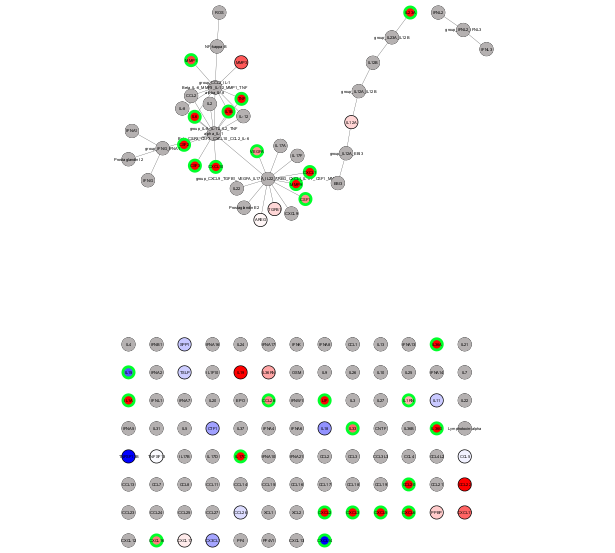

In [20]:
p4c.export_image(filename='pathway_data.png')
p4c.sandbox_get_from('pathway_data.png')
from IPython.display import Image
Image('pathway_data.png')